# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    


The housing price dataset contains range of features associated with residential properties, including their physical attributes, amenities, and location-related characteristics. It is a common type of dataset used for regression or predictive modeling tasks in the field of real estate or housing market analysis. 

Here are some key details about the Housing dataset:

**Features**:

- `sn`: Serial number or identifier for each housing entry.
- `lotsize`: The size of the lot or land associated with the property, typically measured in square feet.
- `bedrooms`: The number of bedrooms in the house, indicating the sleeping spaces.
- `bathrms`: The number of bathrooms in the house, reflecting the sanitary facilities available.
- `stories`: The number of stories or levels in the house, indicating its vertical structure.
- `driveway`: A binary variable indicating the presence or absence of a driveway for vehicular access.
- `recroom`: A binary variable indicating whether the house has a recreation room.
- `fullbase`: A binary variable indicating the presence or absence of a full basement in the house.
- `gashw`: A binary variable indicating whether the house has a gas hot water heating system.
- `airco`: A binary variable indicating the presence or absence of air conditioning in the house.
- `garagepl`: The number of parking spaces available in the garage.
- `prefarea`: A binary variable indicating whether the house is located in a preferred or desirable area.
- `homestyle`: A categorical variable representing the style or type of the house.

**Target Variable**:

- `price`: The price of the house, representing the cost or value of the property.
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict prices of residential property based on various features. 

**Challenges**:

- Potential challenges in working with this dataset may include handling missing or skewed data.
- Managing categorical variables like 'homestyle' and addressing the complexities associated with predicting housing prices.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data("decisionforestpredict", ["housing_train", "housing_test"])

In [5]:
# Fetching in teradata dataframe
housing_train = DataFrame.from_table("housing_train")
housing_test = DataFrame.from_table("housing_test")

In [6]:
# Housing train dataset
housing_train.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
3,49500.0,3060.0,3,1,1,yes,no,no,no,no,0,no,Classic
5,61000.0,6360.0,2,1,1,yes,no,no,no,no,0,no,Eclectic
6,66000.0,4160.0,3,1,1,yes,yes,yes,no,yes,0,no,Eclectic
7,66000.0,3880.0,3,2,2,yes,no,yes,no,no,2,no,Eclectic
9,83800.0,4800.0,3,1,1,yes,yes,yes,no,no,0,no,Eclectic
10,88500.0,5500.0,3,2,4,yes,yes,no,no,yes,1,no,Eclectic
8,69000.0,4160.0,3,1,3,yes,no,no,no,no,0,no,Eclectic
4,60500.0,6650.0,3,1,2,yes,yes,no,no,no,0,no,Eclectic
2,38500.0,4000.0,2,1,1,yes,no,no,no,no,0,no,Classic
1,42000.0,5850.0,3,1,2,yes,no,yes,no,no,1,no,Classic


In [7]:
# Housing train dataset shape
housing_train.shape

(492, 14)

In [8]:
# Housing test dataset
housing_test.head()

sn,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,homestyle
25,42000.0,4960.0,2,1,1,yes,no,no,no,no,0,no,Classic
53,68000.0,9166.0,2,1,1,yes,no,yes,no,yes,2,no,Eclectic
111,43000.0,5076.0,3,1,1,no,no,no,no,no,0,no,Classic
117,93000.0,3760.0,3,1,2,yes,no,no,yes,no,2,no,Eclectic
140,43000.0,3750.0,3,1,2,yes,no,no,no,no,0,no,Classic
142,40000.0,2650.0,3,1,2,yes,no,yes,no,no,1,no,Classic
132,44500.0,3850.0,3,1,2,yes,no,no,no,no,0,no,Classic
38,67000.0,5170.0,3,1,4,yes,no,no,no,yes,0,no,Eclectic
16,37900.0,3185.0,2,1,1,yes,no,no,no,yes,0,no,Classic
13,27000.0,1700.0,3,1,2,yes,no,no,no,no,0,no,Classic


In [9]:
# Housing test dataset shape
housing_test.shape

(46, 14)

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [10]:
# Creating AutoML instance
aml = AutoML(task_type="Regression",
             exclude=['knn'],
             verbose=2,
             max_runtime_secs=300,
             stopping_metric='R2',
             stopping_tolerance=0.7)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 492
Total Columns in the data: 14

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
driveway,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
recroom,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
stories,INTEGER,492,0,None,0,492,0,0.0,100.0
price,FLOAT,492,0,None,0,492,0,0.0,100.0
fullbase,VARCHAR(10) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0
bedrooms,INTEGER,492,0,None,0,492,0,0.0,100.0
bathrms,INTEGER,492,0,None,0,492,0,0.0,100.0
lotsize,FLOAT,492,0,None,0,492,0,0.0,100.0
sn,INTEGER,492,0,None,0,492,0,0.0,100.0
homestyle,VARCHAR(20) CHARACTER SET LATIN,492,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,sn,price,lotsize,bedrooms,bathrms,stories,garagepl
50%,274,62000,4616,3,1,2,0
count,492,492,492,492,492,492,492
mean,272.943,68100.396,5181.795,2.965,1.293,1.803,0.685
min,1,25000,1650,1,1,1,0
max,546,190000,16200,6,4,4,3
75%,413.25,82000,6370,3,2,2,1
25%,132.5,49975,3600,2,1,1,0
std,159.501,26472.496,2182.443,0.731,0.51,0.861,0.854



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
driveway                  2         
recroom                   2         
fullbase                  2         
gashw                     2         
airco                     2         
prefarea                  2         
homestyle                 3         

No Futile columns found.

Target Column Distribution:


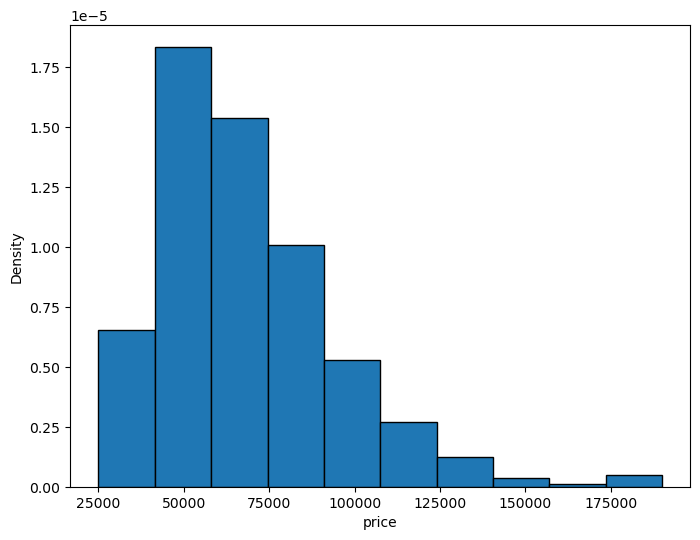

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    stories           7.113821
1   garagepl           2.235772
2   bedrooms           2.235772
3    bathrms           0.203252
4    lotsize           2.235772
5      price           2.439024


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711272079316599"'18


['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea', 'homestyle']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
265,50000.0,3640.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,9
40,54500.0,3150.0,2,2,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,10
120,116000.0,6840.0,5,1,2,0,1,0,1,0,1,1,0,0,1,1,1,0,1,0,0,18
122,80000.0,10500.0,4,2,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,11
61,48000.0,4120.0,2,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,14
244,27000.0,3649.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,22
326,99000.0,8880.0,3,2,2,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,1,13
305,60000.0,5800.0,3,1,1,0,1,1,0,1,0,0,1,1,0,2,1,0,0,0,1,21
427,49500.0,5320.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,15
223,70100.0,4200.0,3,1,2,0,1,1,0,1,0,1,0,1,0,1,1,0,0,0,1,23


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
200,52000.0,3570.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,26
242,52000.0,3000.0,2,1,2,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,28
379,84000.0,7160.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,0,1,0,0,1,124
448,120000.0,5500.0,4,2,2,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0,0,27
488,44100.0,8100.0,2,1,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,30
154,42000.0,3600.0,3,1,2,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,126
385,78000.0,6600.0,4,2,2,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1,29
112,46500.0,4500.0,2,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,125
366,99000.0,13200.0,2,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,0,0,1,24
93,163000.0,7420.0,4,1,2,0,1,0,1,0,1,1,0,0,1,2,1,0,1,0,0,120


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    lotsize           2.235772
1    bathrms           0.203252
2   bedrooms           2.235772
3    stories           7.113821
4      price           2.439024
5   garagepl           2.235772


['price', 'bathrms', 'garagepl', 'bedrooms', 'lotsize', 'stories']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711273331372830"'18


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711273094006255"'18
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711271921395646"'


['stories', 'airco_1', 'homestyle_0', 'bathrms', 'sn', 'recroom_1', 'homestyle_1', 'driveway_1', 'fullbase_1', 'prefarea_1', 'recroom_0', 'driveway_0', 'airco_0', 'garagepl', 'fullbase_0', 'lotsize']


['stories', 'bathrms', 'sn', 'garagepl', 'lotsize']


airco_1,homestyle_0,airco_0,id,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,fullbase_0,driveway_0,price,stories,bathrms,sn,garagepl,lotsize
0,0,1,8,0,0,1,0,0,1,1,0,58000.0,-1.1754677333050345,-0.50260282862345,-0.6344011260379445,-0.7628533219155936,-0.334462200813365
1,0,0,279,1,0,1,1,1,0,0,0,86000.0,-1.1754677333050345,-0.50260282862345,0.6950114202687131,1.806757867694827,1.571635456685604
1,0,0,443,0,0,1,0,1,1,1,0,95000.0,1.8337296639558538,1.690573150824331,0.836301642581498,-0.7628533219155936,0.7904478921368461
1,0,0,365,1,0,1,1,0,0,0,0,66000.0,-1.1754677333050345,-0.50260282862345,-1.7711451873726227,-0.7628533219155936,-0.4282047085592159
0,0,1,422,0,1,0,0,0,1,1,1,32000.0,-1.1754677333050345,-0.50260282862345,-0.705046237194337,-0.7628533219155936,-1.5791543869943856
1,0,0,136,0,0,1,0,0,1,1,0,84000.0,1.8337296639558538,1.690573150824331,1.6519315622962105,-0.7628533219155936,0.7904478921368461
1,0,0,16,0,0,1,0,0,1,1,0,87000.0,1.8337296639558538,-0.50260282862345,1.4592630773242312,1.806757867694827,1.7653699726936958
1,0,0,411,0,0,1,0,0,1,1,0,83000.0,1.8337296639558538,-0.50260282862345,1.6455092794638113,-0.7628533219155936,-0.09489801435174595
1,0,0,107,0,0,1,0,1,1,1,0,95000.0,1.8337296639558538,1.690573150824331,0.48949836963193505,-0.7628533219155936,0.7487845553609124
0,0,1,256,0,1,1,0,0,1,1,0,49000.0,-1.1754677333050345,-0.50260282862345,0.41243097564314335,-0.7628533219155936,-0.5896501385659592


airco_1,homestyle_0,airco_0,id,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,fullbase_0,driveway_0,price,stories,bathrms,sn,garagepl,lotsize
1,0,0,484,0,0,1,0,1,1,1,0,89900.0,1.8337296639558538,1.690573150824331,0.8234570769166993,-0.7628533219155936,0.8425270631067633
1,1,0,200,0,0,1,0,1,1,1,0,112000.0,3.338328362586298,1.690573150824331,0.8427239254138973,-0.7628533219155936,0.7175370527789621
0,0,1,454,0,0,1,1,1,1,0,0,93000.0,1.8337296639558538,-0.50260282862345,1.2409054610226546,-0.7628533219155936,0.8789824827857053
0,0,1,204,0,0,1,0,0,1,1,0,52500.0,-1.1754677333050345,-0.50260282862345,-0.08850708528400301,-0.7628533219155936,-0.7198480659907521
0,0,1,492,0,0,1,0,0,1,1,0,87250.0,1.8337296639558538,-0.50260282862345,-0.36466524707717346,0.5219522728896168,-0.907333081482454
0,0,1,372,0,1,1,0,0,1,1,0,49000.0,-1.1754677333050345,-0.50260282862345,0.09131683402317772,1.806757867694827,-0.9359766255159084
1,1,0,417,0,0,1,0,0,1,1,0,120000.0,3.338328362586298,-0.50260282862345,1.6069755824694154,1.806757867694827,1.050843746986432
0,0,1,214,0,1,1,0,0,1,1,0,38000.0,-1.1754677333050345,-0.50260282862345,-0.22337502476438859,0.5219522728896168,-0.7823430711546527
1,1,0,368,1,0,1,0,0,0,1,0,103000.0,3.338328362586298,1.690573150824331,1.536330471313023,0.5219522728896168,1.4049821095818689
0,0,1,123,1,1,1,1,0,0,0,0,47000.0,-1.1754677333050345,-0.50260282862345,-1.2252511466186813,-0.7628533219155936,0.5612995398692106


['stories', 'airco_1', 'homestyle_0', 'bathrms', 'homestyle_2', 'sn', 'homestyle_1', 'garagepl', 'lotsize']


['r_stories', 'r_bathrms', 'r_sn', 'r_garagepl', 'r_lotsize']


id,r_homestyle_2,r_airco_1,r_homestyle_0,r_homestyle_1,price,r_stories,r_bathrms,r_sn,r_garagepl,r_lotsize
8,1,0,0,0,58000.0,-1.1754677333050345,-0.50260282862345,-0.6344011260379445,-0.7628533219155936,-0.334462200813365
279,1,1,0,0,86000.0,-1.1754677333050345,-0.50260282862345,0.6950114202687131,1.806757867694827,1.571635456685604
443,1,1,0,0,95000.0,1.8337296639558538,1.690573150824331,0.836301642581498,-0.7628533219155936,0.7904478921368461
365,1,1,0,0,66000.0,-1.1754677333050345,-0.50260282862345,-1.7711451873726227,-0.7628533219155936,-0.4282047085592159
422,0,0,0,1,32000.0,-1.1754677333050345,-0.50260282862345,-0.705046237194337,-0.7628533219155936,-1.5791543869943856
136,1,1,0,0,84000.0,1.8337296639558538,1.690573150824331,1.6519315622962105,-0.7628533219155936,0.7904478921368461
16,1,1,0,0,87000.0,1.8337296639558538,-0.50260282862345,1.4592630773242312,1.806757867694827,1.7653699726936958
411,1,1,0,0,83000.0,1.8337296639558538,-0.50260282862345,1.6455092794638113,-0.7628533219155936,-0.09489801435174595
107,1,1,0,0,95000.0,1.8337296639558538,1.690573150824331,0.48949836963193505,-0.7628533219155936,0.7487845553609124
256,0,0,0,1,49000.0,-1.1754677333050345,-0.50260282862345,0.41243097564314335,-0.7628533219155936,-0.5896501385659592


id,r_homestyle_2,r_airco_1,r_homestyle_0,r_homestyle_1,price,r_stories,r_bathrms,r_sn,r_garagepl,r_lotsize
484,1,1,0,0,89900.0,1.8337296639558538,1.690573150824331,0.8234570769166993,-0.7628533219155936,0.8425270631067633
200,0,1,1,0,112000.0,3.338328362586298,1.690573150824331,0.8427239254138973,-0.7628533219155936,0.7175370527789621
454,1,0,0,0,93000.0,1.8337296639558538,-0.50260282862345,1.2409054610226546,-0.7628533219155936,0.8789824827857053
204,1,0,0,0,52500.0,-1.1754677333050345,-0.50260282862345,-0.08850708528400301,-0.7628533219155936,-0.7198480659907521
492,1,0,0,0,87250.0,1.8337296639558538,-0.50260282862345,-0.36466524707717346,0.5219522728896168,-0.907333081482454
372,0,0,0,1,49000.0,-1.1754677333050345,-0.50260282862345,0.09131683402317772,1.806757867694827,-0.9359766255159084
417,0,1,1,0,120000.0,3.338328362586298,-0.50260282862345,1.6069755824694154,1.806757867694827,1.050843746986432
214,0,0,0,1,38000.0,-1.1754677333050345,-0.50260282862345,-0.22337502476438859,0.5219522728896168,-0.7823430711546527
368,0,1,1,0,103000.0,3.338328362586298,1.690573150824331,1.536330471313023,0.5219522728896168,1.4049821095818689
123,0,0,0,1,47000.0,-1.1754677333050345,-0.50260282862345,-1.2252511466186813,-0.7628533219155936,0.5612995398692106


['sn', 'lotsize', 'bathrms', 'stories', 'garagepl']


airco_1,homestyle_0,airco_0,homestyle_2,recroom_1,id,prefarea_0,gashw_0,bedrooms,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,gashw_1,fullbase_0,driveway_0,price,sn,lotsize,bathrms,stories,garagepl
0,0,1,1,0,38,1,1,3,0,1,0,0,1,0,1,0,56000.0,-0.9041370049987152,-1.0323230918102566,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,1,0,8,1,1,3,0,1,0,0,1,0,1,0,58000.0,-0.6344011260379442,-0.3344622008133655,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,1,0,16,1,1,3,0,1,0,0,1,0,1,0,87000.0,1.4592630773242303,1.7653699726936982,-0.5026028286234494,1.8337296639558482,1.8067578676948284
0,0,1,0,0,34,1,1,3,1,0,0,0,1,0,1,1,25245.0,-1.4436087629202572,-1.34479811762976,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,1,0,44,0,1,3,0,1,0,1,1,0,1,0,65500.0,0.9197913194026884,-0.5948580556629517,-0.5026028286234494,0.32913096532540864,0.5219522728896171
1,0,0,1,0,52,1,1,3,0,1,1,0,1,0,0,0,94500.0,-1.0518495101438992,-0.5115313821110842,1.6905731508243291,0.32913096532540864,0.5219522728896171
0,0,1,0,0,51,1,1,3,1,1,0,0,1,0,1,0,35500.0,-1.4307641972554586,-0.3032146982314151,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
1,0,0,1,0,59,1,1,3,0,1,0,0,1,0,1,0,98000.0,0.2711407533303583,0.5300520372872609,-0.5026028286234494,-1.175467733305031,0.5219522728896171
0,0,1,1,0,23,1,1,3,0,1,0,0,1,0,1,0,70100.0,-0.3775098127419719,-0.40737304017124965,-0.5026028286234494,0.32913096532540864,0.5219522728896171
1,0,0,1,1,71,1,1,3,0,1,0,0,0,0,1,0,88500.0,0.2582961876655597,0.7123291356819713,1.6905731508243291,1.8337296639558482,-0.7628533219155942


airco_1,homestyle_0,airco_0,homestyle_2,recroom_1,id,prefarea_0,gashw_0,bedrooms,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,gashw_1,fullbase_0,driveway_0,price,sn,lotsize,bathrms,stories,garagepl
0,0,1,0,0,25,1,1,2,1,1,0,0,1,0,1,0,45000.0,0.014249440034385967,0.9206458195616404,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,0,0,30,1,1,2,1,1,0,0,1,0,1,0,44100.0,1.324395137843845,1.6237146276555232,-0.5026028286234494,-1.175467733305031,0.5219522728896171
0,0,1,0,0,126,1,1,3,1,0,0,0,1,0,1,1,42000.0,-0.8206473281775242,-0.7198480659907531,-0.5026028286234494,0.32913096532540864,0.5219522728896171
1,0,0,1,0,28,1,1,2,0,1,0,0,1,0,1,0,52000.0,-0.255486438926385,-1.0323230918102566,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,1,1,29,0,1,4,0,1,1,1,0,0,0,0,78000.0,0.6629000061067162,0.8425270631067645,1.6905731508243291,0.32913096532540864,-0.7628533219155942
0,0,1,0,0,125,1,1,2,1,0,0,0,1,0,1,1,46500.0,-1.090383207138295,-0.25113552726149785,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,1,0,31,1,1,5,0,0,1,0,1,0,0,1,53900.0,-0.5123777522223574,-1.2823031124658595,1.6905731508243291,-1.175467733305031,0.5219522728896171
1,0,0,0,0,127,1,1,4,1,1,0,0,1,0,1,0,48000.0,-1.6041658337302398,-0.7719272369606704,-0.5026028286234494,0.32913096532540864,1.8067578676948284
0,0,1,1,0,26,1,1,3,0,1,1,0,1,0,0,0,52000.0,-0.525222317887156,-0.7354718172817283,-0.5026028286234494,0.32913096532540864,-0.7628533219155942
0,0,1,0,0,122,1,1,3,1,0,0,0,1,0,1,1,47900.0,-0.44173264106596494,-1.1885606047200084,-0.5026028286234494,-1.175467733305031,-0.7628533219155942


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9']


response_column : price                                                                                                                               
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2, 0.3)
max_depth : (5, 3, 4, 7, 8)
min_node_size : (1, 2, 3, 4)
num_trees : (-1, 20, 30, 40)
Total number of models for decision_forest : 320
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : price
name : glm
family : GAUSSIAN
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
learning_rate : ('invtime', 'constant', 'adaptive')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
iter_num_no_change : (5, 10, 50)
iter_max : (300, 200, 400, 500)
batch_size : (10, 80, 100, 150)
Total number of models for glm : 5184
-------------------------------------------------------------------------------------

DECISIONFOREST_3                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


GLM_3                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


SVM_0                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


XGBOOST_3                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,10565.158459,1.716932e+08,0.041036,13103.175504,0.202575,0.749869,0.701063
1,2,glm,lasso,10604.691602,2.001030e+08,0.040530,14145.778271,0.201321,0.708480,0.651599
2,3,glm,rfe,11582.401946,2.454476e+08,0.041516,15666.766015,0.203754,0.642420,0.606261
3,4,glm,pca,14111.663450,3.440028e+08,0.072478,18547.313400,0.269217,0.498840,0.441890
4,5,xgboost,lasso,15394.175886,3.781728e+08,0.072659,19446.665885,0.269554,0.449060,0.341559
5,6,decision_forest,rfe,13782.068603,4.596149e+08,0.069067,21438.630925,0.262805,0.330411,0.262700
6,7,decision_forest,pca,16982.322850,4.971261e+08,0.101021,22296.325360,0.317839,0.275763,0.193464
7,8,svm,lasso,66224.753738,5.071982e+09,51.879119,71217.850925,7.202716,-6.389104,-7.830880
8,9,svm,rfe,66270.350088,5.078172e+09,20.575205,71261.293916,4.535990,-6.398121,-7.146246
9,10,svm,pca,66270.670050,5.078216e+09,0.000000,71261.603693,0.000000,-6.398185,-7.238888


In [11]:
# Fitting train data
aml.fit(housing_train,housing_train.price)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [12]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,10565.158459,1.716932e+08,0.041036,13103.175504,0.202575,0.749869,0.701063
1,2,glm,lasso,10604.691602,2.001030e+08,0.040530,14145.778271,0.201321,0.708480,0.651599
2,3,glm,rfe,11582.401946,2.454476e+08,0.041516,15666.766015,0.203754,0.642420,0.606261
3,4,glm,pca,14111.663450,3.440028e+08,0.072478,18547.313400,0.269217,0.498840,0.441890
4,5,xgboost,lasso,15394.175886,3.781728e+08,0.072659,19446.665885,0.269554,0.449060,0.341559
5,6,decision_forest,rfe,13782.068603,4.596149e+08,0.069067,21438.630925,0.262805,0.330411,0.262700
6,7,decision_forest,pca,16982.322850,4.971261e+08,0.101021,22296.325360,0.317839,0.275763,0.193464
7,8,svm,lasso,66224.753738,5.071982e+09,51.879119,71217.850925,7.202716,-6.389104,-7.830880
8,9,svm,rfe,66270.350088,5.078172e+09,20.575205,71261.293916,4.535990,-6.398121,-7.146246
9,10,svm,pca,66270.670050,5.078216e+09,0.000000,71261.603693,0.000000,-6.398185,-7.238888


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [13]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,10565.158459,1.716932e+08,0.041036,13103.175504,0.202575,0.749869,0.701063


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [14]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

decision_forest lasso

 Prediction : 
      price   id     prediction  confidence_lower  confidence_upper
0   89900.0  484   84379.097338      80666.121193      88092.073483
1  112000.0  200  112160.892857     107605.574733     116716.210981
2   93000.0  454   78238.449791      75375.674877      81101.224705
3   52500.0  204   63083.227467      60297.897350      65868.557584
4   87250.0  492   68820.409646      63407.323346      74233.495946
5   49000.0  372   54967.261905      47970.747152      61963.776657
6  120000.0  417  106880.250000     101862.881482     111897.618518
7   38000.0  214   51497.527473      43929.184344      59065.870601
8  103000.0  368  105805.250000     101213.454496     110397.045504
9   47000.0  123   51141.880952      45870.964355      56412.797550

 Performance Metrics : 
            MAE           MSE      MSLE       MAPE        MPE          RMSE     RMSLE       ME        R2        EV          MPD       MGD
0  10565.158459  1.716932e+08  0.041036  18.092502 

In [15]:
# Printing prediction
prediction.head()

price,id,prediction,confidence_lower,confidence_upper
32500.0,242,51133.80525030525,44704.618983272245,57562.99151733826
37000.0,209,50955.880952380954,45427.85326051749,56483.90864424442
37200.0,542,46726.11111111111,43141.390834869824,50310.831387352395
37900.0,519,48028.87667887668,43395.20386129948,52662.54949645388
38000.0,214,51497.52747252747,43929.184344042325,59065.87060101262
41000.0,187,45747.777777777774,42232.20218082615,49263.3533747294
38000.0,487,48642.777777777774,43679.06861115003,53606.486944405515
35000.0,466,50128.717948717946,42606.41263593155,57651.02326150434
30000.0,247,52089.19413919414,44643.94292450973,59534.445353878546
28000.0,520,50262.09096459096,46675.61208103864,53848.569848143285


In [16]:
# Generating prediction and metrics on default test data using rank 3 model
prediction = aml.predict(rank=3)

glm rfe

 Prediction : 
    id     prediction     price
0  484   95156.425066   89900.0
1  200  105543.300675  112000.0
2  454   76347.212176   93000.0
3  204   59831.502954   52500.0
4  492   63224.723281   87250.0
5  372   42416.375134   49000.0
6  417   98051.097751  120000.0
7  214   42064.538483   38000.0
8  368  112315.180844  103000.0
9  123   49751.334708   47000.0

 Performance Metrics : 
            MAE           MSE      MSLE       MAPE      MPE          RMSE     RMSLE            ME       R2        EV          MPD       MGD
0  11582.401946  2.454476e+08  0.041516  17.535456 -7.30067  15666.766015  0.203754  69562.936539  0.64242  0.646985  3012.961022  0.040841


In [17]:
# Printing prediction
prediction.head()

id,prediction,price
26,61240.95397065661,52000.0
28,65795.5152583172,52000.0
29,86647.74020362404,78000.0
30,60826.38762318992,44100.0
120,93437.06346063511,163000.0
121,74776.09055640842,86000.0
31,76019.25581515259,53900.0
27,99894.14017699879,120000.0
25,53414.66665990854,45000.0
24,97804.41236255402,99000.0


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [18]:
# Generating prediction and metrics on test data
prediction = aml.predict(housing_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711272393330877"'

Updated dataset after performing categorical encoding :


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
260,41000.0,6000.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,10
251,48500.0,3450.0,3,1,1,0,1,1,0,0,1,1,0,1,0,2,1,0,0,1,0,14
408,87500.0,6420.0,3,1,3,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,22
53,68000.0,9166.0,2,1,1,0,1,1,0,0,1,1,0,0,1,2,1,0,0,0,1,11
255,61000.0,4360.0,4,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,15
16,37900.0,3185.0,2,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,23
469,55000.0,2176.0,2,1,2,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,8
364,72000.0,10700.0,3,1,2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,16
38,67000.0,5170.0,3,1,4,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,12
198,40500.0,4350.0,3,1,2,1,0,1,0,1,0,0,1,1,0,1,1,0,0,1,0,20


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711273046913528"'

Updated dataset after performing Lasso feature selection:


id,stories,airco_1,homestyle_0,bathrms,sn,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,driveway_0,airco_0,garagepl,fullbase_0,lotsize,price
40,1,1,0,1,401,1,0,1,1,1,0,0,0,2,0,7410.0,92500.0
36,1,0,0,1,234,0,1,0,0,0,1,1,1,0,1,3970.0,32500.0
69,1,0,0,1,353,0,0,1,0,0,1,0,1,2,1,7980.0,78500.0
10,1,0,0,1,260,0,1,1,0,0,1,0,1,0,1,6000.0,41000.0
11,1,1,0,1,53,0,0,1,1,0,1,0,0,2,0,9166.0,68000.0
14,1,0,0,1,251,0,1,1,1,0,1,0,1,2,0,3450.0,48500.0
12,4,1,0,1,38,0,0,1,0,0,1,0,0,0,1,5170.0,67000.0
67,4,0,0,1,317,0,0,1,0,0,1,0,1,0,1,5000.0,80000.0
22,3,0,0,1,408,0,0,1,1,1,1,0,1,0,0,6420.0,87500.0
27,1,0,0,1,472,0,0,1,1,1,1,0,1,0,0,2787.0,60500.0



Updated dataset after performing scaling on Lasso selected features :


airco_1,homestyle_0,airco_0,id,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,fullbase_0,driveway_0,price,stories,bathrms,sn,garagepl,lotsize
0,0,1,25,0,1,1,0,0,1,1,0,44500.0,-1.1754677333050345,-0.50260282862345,-0.21053045909958995,-0.7628533219155936,-0.7719272369606693
1,0,0,40,1,0,1,1,1,0,0,0,92500.0,-1.1754677333050345,-0.50260282862345,0.7656565314251055,1.806757867694827,1.2643683479630925
0,0,1,48,0,1,1,0,0,1,1,0,42000.0,-1.1754677333050345,-0.50260282862345,-1.6491218135570358,-0.7628533219155936,-0.011571340799878474
0,0,1,36,0,1,0,0,0,1,1,1,32500.0,-1.1754677333050345,-0.50260282862345,-0.30686470158557966,-0.7628533219155936,-0.5271551334020586
0,0,1,10,0,1,1,0,0,1,1,0,41000.0,-1.1754677333050345,-0.50260282862345,-0.1398853479431975,-0.7628533219155936,0.5300520372872602
0,0,1,27,0,0,1,1,1,1,0,0,60500.0,-1.1754677333050345,-0.50260282862345,1.2216386125254566,-0.7628533219155936,-1.1432517259761787
1,0,0,11,0,0,1,1,0,1,0,0,68000.0,-1.1754677333050345,-0.50260282862345,-1.4692978942498551,1.806757867694827,2.178878590194838
0,0,1,14,0,1,1,1,0,1,0,0,48500.0,-1.1754677333050345,-0.50260282862345,-0.19768589343479132,1.806757867694827,-0.7979668224456279
0,0,1,22,0,0,1,1,1,1,0,0,87500.0,1.8337296639558538,-0.50260282862345,0.8106125112519007,-0.7628533219155936,0.7487845553609124
0,0,1,69,0,0,1,0,0,1,1,0,78500.0,-1.1754677333050345,-0.50260282862345,0.4573869554699385,1.806757867694827,1.5612196224916204



Updated dataset after performing RFE feature selection:


id,stories,airco_1,homestyle_0,bathrms,homestyle_2,sn,homestyle_1,garagepl,lotsize,price
40,1,1,0,1,1,401,0,2,7410.0,92500.0
36,1,0,0,1,0,234,1,0,3970.0,32500.0
69,1,0,0,1,1,353,0,2,7980.0,78500.0
10,1,0,0,1,0,260,1,0,6000.0,41000.0
11,1,1,0,1,1,53,0,2,9166.0,68000.0
14,1,0,0,1,0,251,1,2,3450.0,48500.0
12,4,1,0,1,1,38,0,0,5170.0,67000.0
67,4,0,0,1,1,317,0,0,5000.0,80000.0
22,3,0,0,1,1,408,0,0,6420.0,87500.0
27,1,0,0,1,1,472,0,0,2787.0,60500.0



Updated dataset after performing scaling on RFE selected features :


id,r_homestyle_2,r_airco_1,r_homestyle_0,r_homestyle_1,price,r_stories,r_bathrms,r_sn,r_garagepl,r_lotsize
40,1,1,0,0,92500.0,-1.1754677333050345,-0.50260282862345,0.7656565314251055,1.806757867694827,1.2643683479630925
36,0,0,0,1,32500.0,-1.1754677333050345,-0.50260282862345,-0.30686470158557966,-0.7628533219155936,-0.5271551334020586
69,1,0,0,0,78500.0,-1.1754677333050345,-0.50260282862345,0.4573869554699385,1.806757867694827,1.5612196224916204
10,0,0,0,1,41000.0,-1.1754677333050345,-0.50260282862345,-0.1398853479431975,-0.7628533219155936,0.5300520372872602
11,1,1,0,0,68000.0,-1.1754677333050345,-0.50260282862345,-1.4692978942498551,1.806757867694827,2.178878590194838
14,0,0,0,1,48500.0,-1.1754677333050345,-0.50260282862345,-0.19768589343479132,1.806757867694827,-0.7979668224456279
12,1,1,0,0,67000.0,3.338328362586298,-0.50260282862345,-1.5656321367358448,-0.7628533219155936,0.09779491823694761
67,1,0,0,0,80000.0,3.338328362586298,-0.50260282862345,0.22618477350356328,-0.7628533219155936,0.009260327588088398
22,1,0,0,0,87500.0,1.8337296639558538,-0.50260282862345,0.8106125112519007,-0.7628533219155936,0.7487845553609124
27,1,0,0,0,60500.0,-1.1754677333050345,-0.50260282862345,1.2216386125254566,-0.7628533219155936,-1.1432517259761787



Updated dataset after performing scaling for PCA feature selection :


airco_1,homestyle_0,airco_0,homestyle_2,recroom_1,id,prefarea_0,gashw_0,bedrooms,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,gashw_1,fullbase_0,driveway_0,price,sn,lotsize,bathrms,stories,garagepl
0,0,1,1,0,67,1,1,3,0,1,0,0,1,0,1,0,80000.0,0.22618477350356314,0.009260327588088412,-0.5026028286234494,3.338328362586288,-0.7628533219155942
1,0,0,0,0,23,1,1,2,1,1,0,0,1,0,1,0,37900.0,-1.7069223590486287,-0.9359766255159098,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,1,1,40,0,1,3,0,1,1,1,0,0,0,0,92500.0,0.765656531425105,1.2643683479630943,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,0,0,48,1,1,2,1,1,0,0,1,0,1,0,42000.0,-1.649121813557035,-0.01157134079987849,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,1,0,69,1,1,3,0,1,0,0,1,0,1,0,78500.0,0.45738695546993824,1.5612196224916226,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,0,0,10,1,1,2,1,1,0,0,1,0,1,0,41000.0,-0.13988534794319743,0.5300520372872609,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,1,0,27,0,1,3,0,1,1,1,1,0,0,0,60500.0,1.221638612525456,-1.1432517259761805,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,1,0,11,1,1,2,0,1,1,0,1,0,0,0,68000.0,-1.4692978942498542,2.178878590194841,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,0,0,14,1,1,3,1,1,1,0,1,0,0,0,48500.0,-0.19768589343479123,-0.797966822445629,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,0,0,36,1,1,1,1,0,0,0,1,0,1,1,32500.0,-0.3068647015855795,-0.5271551334020593,-0.5026028286234494,-1.175467733305031,-0.7628533219155942



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,25,-1.212708,-1.063731,-0.313326,-0.550789,0.092915,-1.034314,0.082146,-0.217252,0.379940,-0.544570,44500.0
1,12,-1.702851,2.244144,-0.163064,1.531449,-1.726684,1.435539,-0.336577,0.312267,-0.721428,-0.019429,67000.0
2,22,0.436066,1.674569,-1.184835,-0.517098,-0.149681,0.581587,-1.015373,0.346597,-1.125296,-0.054246,87500.0
3,23,-1.846762,-1.338399,0.503782,-0.227864,-0.735116,-0.101448,1.053769,-0.133609,0.006323,-0.570542,37900.0
4,67,-1.071889,2.634593,-1.143026,1.133870,-0.666936,0.448109,-1.183424,0.156071,-0.190941,-0.026246,80000.0
5,40,2.732152,-1.196533,-0.243570,-0.130603,0.061535,0.992846,0.669891,0.796020,0.182694,0.034230,92500.0
6,48,-1.466384,-1.594199,0.440659,-0.192916,-0.727838,-0.698315,-0.370444,0.078220,-0.266739,-0.400643,42000.0
7,36,-1.369171,-1.244376,-0.168772,-0.602154,-0.121956,-1.221634,0.387921,0.188735,0.173794,0.360015,32500.0
8,69,1.864265,-1.612397,-0.365533,1.182782,-0.340395,-0.540878,-0.469641,-0.426836,0.208017,0.124617,78500.0
9,10,-0.433849,-1.132748,-0.239012,-0.552218,-0.744052,-1.251285,-0.337724,-0.066861,0.077437,-0.506742,41000.0


Data Transformation completed.
decision_forest lasso

 Prediction : 
     price  id    prediction  confidence_lower  confidence_upper
0  92500.0  40  79135.109416      76425.729561      81844.489271
1  32500.0  36  47829.590965      41883.781883      53775.400047
2  78500.0  69  80123.672908      76957.057109      83290.288707
3  41000.0  10  51563.309524      44234.566069      58892.052978
4  68000.0  11  64638.112434      59237.531457      70038.693410
5  48500.0  14  51497.527473      43929.184344      59065.870601
6  87500.0  22  79031.990195      76803.451797      81260.528593
7  67000.0  12  64884.676102      60101.459996      69667.892208
8  80000.0  67  72372.880481      67120.189756      77625.571205
9  60500.0  27  69441.523810      63073.058395      75809.989224

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE          RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  9551.317383  1.227017e+08  0.047414  19.640292

In [19]:
# Printing prediction
prediction.head()

price,id,prediction,confidence_lower,confidence_upper
32500.0,36,47829.59096459096,41883.781882545954,53775.40004663597
37900.0,23,48368.16239316239,43553.706742125454,53182.61804419933
40000.0,41,54702.54761904762,47528.63346835916,61876.46176973607
40500.0,20,53029.11904761905,45962.77269997992,60095.46539525819
42000.0,48,49457.380952380954,44071.839139547475,54842.92276521443
43000.0,52,49189.833333333336,43906.4571756013,54473.20949106537
41000.0,10,51563.30952380953,44234.56606915652,58892.05297846253
33000.0,59,49579.59096459096,45041.92428516527,54117.25764401666
27000.0,17,42701.527777777774,35811.86393840484,49591.19161715071
26000.0,44,53581.666666666664,46093.838346531855,61069.494986801474


In [20]:
# Generating prediction and metrics on test data using rank 2 model
prediction = aml.predict(housing_test,2)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711273052320501"'

Updated dataset after performing categorical encoding :


sn,price,lotsize,bedrooms,bathrms,stories,driveway_0,driveway_1,recroom_0,recroom_1,fullbase_0,fullbase_1,gashw_0,gashw_1,airco_0,airco_1,garagepl,prefarea_0,prefarea_1,homestyle_0,homestyle_1,homestyle_2,id
301,55000.0,4080.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,9
260,41000.0,6000.0,2,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,10
540,85000.0,7320.0,4,2,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,18
463,49000.0,2610.0,3,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1,0,1,0,13
255,61000.0,4360.0,4,1,2,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,1,15
16,37900.0,3185.0,2,1,1,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,23
53,68000.0,9166.0,2,1,1,0,1,1,0,0,1,1,0,0,1,2,1,0,0,0,1,11
440,69000.0,6862.0,3,1,2,0,1,1,0,1,0,1,0,0,1,2,0,1,0,0,1,19
469,55000.0,2176.0,2,1,2,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,8
364,72000.0,10700.0,3,1,2,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,16


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__1711272534148016"'

Updated dataset after performing Lasso feature selection:


id,stories,airco_1,homestyle_0,bathrms,sn,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,driveway_0,airco_0,garagepl,fullbase_0,lotsize,price
59,1,0,0,1,195,0,1,1,0,0,1,0,1,0,1,3180.0,33000.0
39,1,0,0,1,441,0,0,1,0,1,1,0,1,2,1,3520.0,51900.0
29,1,1,0,1,306,0,0,1,0,0,1,0,0,1,1,5885.0,64000.0
51,1,0,0,1,443,0,0,1,0,1,1,0,1,0,1,3520.0,65000.0
75,1,0,0,1,294,0,1,1,0,0,1,0,1,0,1,4040.0,47000.0
11,1,1,0,1,53,0,0,1,1,0,1,0,0,2,0,9166.0,68000.0
22,3,0,0,1,408,0,0,1,1,1,1,0,1,0,0,6420.0,87500.0
67,4,0,0,1,317,0,0,1,0,0,1,0,1,0,1,5000.0,80000.0
12,4,1,0,1,38,0,0,1,0,0,1,0,0,0,1,5170.0,67000.0
32,1,1,0,1,403,1,0,1,1,1,0,0,0,0,0,6825.0,77500.0



Updated dataset after performing scaling on Lasso selected features :


airco_1,homestyle_0,airco_0,id,recroom_1,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,fullbase_0,driveway_0,price,stories,bathrms,sn,garagepl,lotsize
0,0,1,59,0,1,1,0,0,1,1,0,33000.0,-1.1754677333050345,-0.50260282862345,-0.5573337320491528,-0.7628533219155936,-0.9385805840644043
0,0,1,39,0,0,1,0,1,1,1,0,51900.0,-1.1754677333050345,-0.50260282862345,1.022547844721078,1.806757867694827,-0.7615114027666858
1,0,0,29,0,0,1,0,0,1,1,0,64000.0,-1.1754677333050345,-0.50260282862345,0.15553966234717084,0.5219522728896168,0.47016099067185546
0,0,1,51,0,0,1,0,1,1,1,0,65000.0,-1.1754677333050345,-0.50260282862345,1.0353924103858767,-0.7628533219155936,-0.7615114027666858
0,0,1,75,0,1,1,0,0,1,1,0,47000.0,-1.1754677333050345,-0.50260282862345,0.0784722683583791,-0.7628533219155936,-0.49069971372311655
1,0,0,11,0,0,1,1,0,1,0,0,68000.0,-1.1754677333050345,-0.50260282862345,-1.4692978942498551,1.806757867694827,2.178878590194838
0,0,1,22,0,0,1,1,1,1,0,0,87500.0,1.8337296639558538,-0.50260282862345,0.8106125112519007,-0.7628533219155936,0.7487845553609124
0,0,1,67,0,0,1,0,0,1,1,0,80000.0,3.338328362586298,-0.50260282862345,0.22618477350356328,-0.7628533219155936,0.009260327588088398
1,0,0,12,0,0,1,0,0,1,1,0,67000.0,3.338328362586298,-0.50260282862345,-1.5656321367358448,-0.7628533219155936,0.09779491823694761
1,0,0,32,1,0,1,1,1,0,0,0,77500.0,-1.1754677333050345,-0.50260282862345,0.7785010970899041,-0.7628533219155936,0.9597051977890769



Updated dataset after performing RFE feature selection:


id,stories,airco_1,homestyle_0,bathrms,homestyle_2,sn,homestyle_1,garagepl,lotsize,price
12,4,1,0,1,1,38,0,0,5170.0,67000.0
27,1,0,0,1,1,472,0,0,2787.0,60500.0
59,1,0,0,1,0,195,1,0,3180.0,33000.0
9,1,0,0,1,1,301,0,0,4080.0,55000.0
29,1,1,0,1,1,306,0,1,5885.0,64000.0
51,1,0,0,1,1,443,0,0,3520.0,65000.0
32,1,1,0,1,1,403,0,0,6825.0,77500.0
75,1,0,0,1,0,294,1,0,4040.0,47000.0
11,1,1,0,1,1,53,0,2,9166.0,68000.0
39,1,0,0,1,1,441,0,2,3520.0,51900.0



Updated dataset after performing scaling on RFE selected features :


id,r_homestyle_2,r_airco_1,r_homestyle_0,r_homestyle_1,price,r_stories,r_bathrms,r_sn,r_garagepl,r_lotsize
36,0,0,0,1,32500.0,-1.1754677333050345,-0.50260282862345,-0.30686470158557966,-0.7628533219155936,-0.5271551334020586
59,0,0,0,1,33000.0,-1.1754677333050345,-0.50260282862345,-0.5573337320491528,-0.7628533219155936,-0.9385805840644043
9,1,0,0,0,55000.0,-1.1754677333050345,-0.50260282862345,0.12342824818517428,-0.7628533219155936,-0.46986804533514964
39,1,0,0,0,51900.0,-1.1754677333050345,-0.50260282862345,1.022547844721078,1.806757867694827,-0.7615114027666858
51,1,0,0,0,65000.0,-1.1754677333050345,-0.50260282862345,1.0353924103858767,-0.7628533219155936,-0.7615114027666858
32,1,1,0,0,77500.0,-1.1754677333050345,-0.50260282862345,0.7785010970899041,-0.7628533219155936,0.9597051977890769
75,0,0,0,1,47000.0,-1.1754677333050345,-0.50260282862345,0.0784722683583791,-0.7628533219155936,-0.49069971372311655
11,1,1,0,0,68000.0,-1.1754677333050345,-0.50260282862345,-1.4692978942498551,1.806757867694827,2.178878590194838
22,1,0,0,0,87500.0,1.8337296639558538,-0.50260282862345,0.8106125112519007,-0.7628533219155936,0.7487845553609124
29,1,1,0,0,64000.0,-1.1754677333050345,-0.50260282862345,0.15553966234717084,0.5219522728896168,0.47016099067185546



Updated dataset after performing scaling for PCA feature selection :


airco_1,homestyle_0,airco_0,homestyle_2,recroom_1,id,prefarea_0,gashw_0,bedrooms,homestyle_1,driveway_1,fullbase_1,prefarea_1,recroom_0,gashw_1,fullbase_0,driveway_0,price,sn,lotsize,bathrms,stories,garagepl
0,0,1,0,0,59,1,1,2,1,1,0,0,1,0,1,0,33000.0,-0.5573337320491525,-0.9385805840644056,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,1,0,39,0,1,3,0,1,0,1,1,0,1,0,51900.0,1.0225478447210774,-0.7615114027666869,-0.5026028286234494,-1.175467733305031,1.8067578676948284
1,0,0,1,0,29,1,1,2,0,1,0,0,1,0,1,0,64000.0,0.15553966234717076,0.4701609906718561,-0.5026028286234494,-1.175467733305031,0.5219522728896171
0,0,1,1,0,51,0,1,3,0,1,0,1,1,0,1,0,65000.0,1.035392410385876,-0.7615114027666869,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
0,0,1,0,0,75,1,1,2,1,1,0,0,1,0,1,0,47000.0,0.07847226835837905,-0.4906997137231172,-0.5026028286234494,-1.175467733305031,-0.7628533219155942
1,0,0,1,0,11,1,1,2,0,1,1,0,1,0,0,0,68000.0,-1.4692978942498542,2.178878590194841,-0.5026028286234494,-1.175467733305031,1.8067578676948284
0,0,1,1,0,22,0,1,3,0,1,1,1,1,0,0,0,87500.0,0.8106125112519003,0.7487845553609134,-0.5026028286234494,1.8337296639558482,-0.7628533219155942
0,0,1,1,0,67,1,1,3,0,1,0,0,1,0,1,0,80000.0,0.22618477350356314,0.009260327588088412,-0.5026028286234494,3.338328362586288,-0.7628533219155942
1,0,0,1,0,12,1,1,3,0,1,0,0,1,0,1,0,67000.0,-1.565632136735844,0.09779491823694775,-0.5026028286234494,3.338328362586288,-0.7628533219155942
1,0,0,1,1,32,0,1,3,0,1,1,1,0,0,0,0,77500.0,0.7785010970899037,0.9597051977890783,-0.5026028286234494,-1.175467733305031,-0.7628533219155942



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,price
0,36,-1.369171,-1.244376,-0.168772,-0.602154,-0.121956,-1.221634,0.387921,0.188735,0.173794,0.360015,32500.0
1,67,-1.071889,2.634593,-1.143026,1.133870,-0.666936,0.448109,-1.183424,0.156071,-0.190941,-0.026246,80000.0
2,22,0.436066,1.674569,-1.184835,-0.517098,-0.149681,0.581587,-1.015373,0.346597,-1.125296,-0.054246,87500.0
3,27,0.097740,-0.363043,-1.094884,-1.806548,1.420171,0.035027,0.188841,-0.662482,-0.059580,0.003944,60500.0
4,12,-1.702851,2.244144,-0.163064,1.531449,-1.726684,1.435539,-0.336577,0.312267,-0.721428,-0.019429,67000.0
5,59,-1.474117,-1.166772,-0.160654,-0.468734,0.124279,-0.900933,0.088555,-0.189110,0.311384,-0.521604,33000.0
6,9,-0.573912,-0.827514,-0.466610,-0.597516,-0.018643,-0.499914,-0.256562,-0.966181,0.590447,0.199333,55000.0
7,39,1.145001,-1.114998,-1.120372,0.694225,1.703701,-0.350166,0.571300,-0.292433,0.199957,0.403042,51900.0
8,29,0.713664,-1.049937,-0.245372,0.286599,-0.760120,-0.026496,0.770101,-0.793006,0.435955,0.026876,64000.0
9,51,0.035124,-0.359414,-1.219128,-1.145653,0.772859,-0.721654,0.162539,-0.630366,0.185628,0.517291,65000.0


Data Transformation completed.
glm lasso

 Prediction : 
   id    prediction    price
0  59  40340.088440  33000.0
1  39  69561.905867  51900.0
2  29  74246.786946  64000.0
3  51  59913.612425  65000.0
4  75  42484.482460  47000.0
5  11  88946.302108  68000.0
6  67  69407.503280  80000.0
7  12  77479.141948  67000.0
8  22  75885.261589  87500.0
9  32  79206.631827  77500.0

 Performance Metrics : 
           MAE           MSE      MSLE     MAPE     MPE          RMSE     RMSLE            ME        R2        EV         MPD       MGD
0  8501.780796  1.222594e+08  0.037947  16.0366 -8.7221  11057.099157  0.194801  26113.524934  0.620297  0.649059  1962.69876  0.034462


In [21]:
# Printing prediction
prediction.head()

id,prediction,price
10,47043.744334551084,41000.0
12,77479.14194757631,67000.0
13,49085.56026719585,49000.0
14,53185.31331587989,48500.0
16,79692.36083546092,72000.0
17,39993.43754692212,27000.0
15,61109.64234747743,61000.0
11,88946.30210811699,68000.0
9,57151.90086922232,55000.0
8,61217.643308314626,55000.0


In [22]:
# Shape of generated prediction 
prediction.shape

(46, 3)

In [23]:
remove_context()

True